In [213]:
#-*- coding=gbk -*-
import numpy as np
import pandas as pd
%matplotlib inline
from matplotlib import pyplot as plt
train_data = pd.read_csv('data/d_train_20180102.csv',header=0,  encoding='gbk')
# train_data.to_csv('data/d_train_20180102_utf-8.csv',encoding='utf-8')
test_data = pd.read_csv('data/d_test_A_20180102.csv',header=0, encoding='gbk' )
# test_data.to_csv('data/d_test_A_20180102_utf-8.csv',encoding='utf-8')
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5642 entries, 0 to 5641
Data columns (total 42 columns):
id             5642 non-null int64
性别             5642 non-null object
年龄             5642 non-null int64
体检日期           5642 non-null object
*天门冬氨酸氨基转换酶    4421 non-null float64
*丙氨酸氨基转换酶      4421 non-null float64
*碱性磷酸酶         4421 non-null float64
*r-谷氨酰基转换酶     4421 non-null float64
*总蛋白           4421 non-null float64
白蛋白            4421 non-null float64
*球蛋白           4421 non-null float64
白球比例           4421 non-null float64
甘油三酯           4423 non-null float64
总胆固醇           4423 non-null float64
高密度脂蛋白胆固醇      4423 non-null float64
低密度脂蛋白胆固醇      4423 non-null float64
尿素             4264 non-null float64
肌酐             4264 non-null float64
尿酸             4264 non-null float64
乙肝表面抗原         1363 non-null float64
乙肝表面抗体         1363 non-null float64
乙肝e抗原          1363 non-null float64
乙肝e抗体          1363 non-null float64
乙肝核心抗体         1363 non-null float64
白细胞计数      

In [214]:
feature_columns =  [f for f in train_data.columns if f not in ['id','血糖']]

from sklearn import preprocessing   
def preprocess(train,test,feature_columns,drop_thresh):
    train_id = train.id.values.copy()
    test_id = test.id.values.copy()
    data = pd.concat([train,test])
     
    
    # data.dropna(axis=1,thresh=drop_thresh*data.shape[0],inplace=True)
   
    data['性别'] = data['性别'].map({'男':1,'女':0})
    data['体检日期'] = pd.to_datetime(data['体检日期']).apply(lambda a:a.dayofyear)
     
    
    data.fillna(data.median(axis=0),inplace=True)
    scaler = preprocessing.MaxAbsScaler() 
    data[feature_columns] = scaler.fit_transform(data[feature_columns])  
    train_feat = data[data.id.isin(train_id)]
    test_feat = data[data.id.isin(test_id)]
     
    test_feat.drop(labels = ['血糖'],axis = 1,inplace=True)
    
     
    return train_feat,test_feat
train_data,test_data = preprocess(train_data,test_data,feature_columns,0.8)
test_data.describe()

E:\Anaconda3\lib\site-packages\ipykernel_launcher.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


,*r-谷氨酰基转换酶,*丙氨酸氨基转换酶,*天门冬氨酸氨基转换酶,*总蛋白,*球蛋白,*碱性磷酸酶,id,中性粒细胞%,乙肝e抗体,乙肝e抗原,...,红细胞平均血红蛋白浓度,红细胞平均血红蛋白量,红细胞计数,肌酐,血小板体积分布宽度,血小板平均体积,血小板比积,血小板计数,血红蛋白,高密度脂蛋白胆固醇
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,...,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,0.048988,0.052456,0.060189,0.767475,0.469136,0.233452,6248.701000,0.642428,0.230550,0.002559,...,0.725470,0.670045,0.720600,0.432146,0.543759,0.685421,0.169811,0.195584,0.700234,0.270449
std,0.055474,0.037410,0.023015,0.036611,0.048088,0.061528,299.619678,0.091509,0.039215,0.002133,...,0.024252,0.047042,0.072816,0.066286,0.094045,0.075810,0.049228,0.052952,0.080958,0.056915
min,0.009851,0.013410,0.030141,0.638681,0.305833,0.070822,5733.000000,0.360452,0.000000,0.000571,...,0.567100,0.353468,0.436496,0.275392,0.347826,0.440789,0.038158,0.048780,0.312796,0.126894
25%,0.025672,0.032948,0.048741,0.747211,0.442505,0.196109,5987.750000,0.583898,0.228731,0.002283,...,0.714286,0.651007,0.665693,0.384582,0.470356,0.644737,0.138158,0.163454,0.649289,0.238636
50%,0.035462,0.043026,0.054937,0.763569,0.465851,0.226117,6246.500000,0.641808,0.228731,0.002283,...,0.727273,0.673378,0.715328,0.436817,0.525692,0.684211,0.164474,0.191188,0.701422,0.257576
75%,0.050262,0.057207,0.063398,0.788442,0.491878,0.260446,6507.250000,0.703955,0.228731,0.002283,...,0.740260,0.695749,0.773723,0.464716,0.629447,0.730263,0.197368,0.221873,0.762678,0.297348
max,0.850609,0.344545,0.227451,0.949507,0.753400,0.625668,6768.000000,0.918644,0.574616,0.039555,...,0.794372,0.818792,0.986861,0.786552,0.928854,0.947368,1.000000,1.000000,1.000000,0.583333


E:\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:57: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


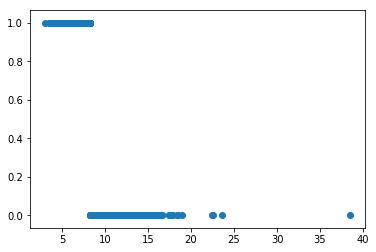

In [215]:
from sklearn.cluster import DBSCAN,AgglomerativeClustering,KMeans
cluster = KMeans(n_clusters=2,n_jobs=-1)
# cluster = DBSCAN(eps=5,min_samples=2000)
# cluster = AgglomerativeClustering(n_clusters=2)
labels = cluster.fit_predict(np.reshape(train_data['血糖'],(-1,1)))
# labels = cluster.fit_predict(train_data[feature_columns])
plt.scatter(train_data['血糖'],labels)

In [205]:
labels_index, labels_count = np.unique(labels,return_counts=True)
pd.DataFrame([labels_index,labels_count])

,0,1
0,0,1
1,5386,256


In [224]:
def regression(X,y,labels):
    from sklearn.cross_validation import KFold
    from sklearn.neural_network import MLPRegressor
    from sklearn.ensemble import AdaBoostRegressor,RandomForestRegressor,\
    ExtraTreesRegressor,GradientBoostingRegressor,BaggingRegressor
    from sklearn.neighbors import KNeighborsRegressor
    from sklearn.linear_model import SGDRegressor
    from sklearn.svm import SVR
    from sklearn.metrics import mean_squared_error
    from imblearn.over_sampling import SMOTE
    from imblearn.combine import SMOTETomek
    from xgboost import XGBRegressor
    feature_columns = list(X.columns)
     
    # print(feature_columns,y_column)
    kf = KFold(len(X), n_folds = 10, shuffle=True)
    train_preds = np.zeros(X.shape[0])
    # rgrs = XGBRegressor(n_jobs=-1,seed=3,subsample=0.8,silent=False,booster='gbtree',max_depth=20,min_child_weight=3,gamma=0.2)
    # rgrs = RandomForestRegressor(n_estimators=20)
   
    rgrs = BaggingRegressor(n_estimators=20,base_estimator=RandomForestRegressor(n_jobs=-1),)
    # rgrs = MLPRegressor(hidden_layer_sizes=(X.shape[1],80,200,400,200,80),max_iter=100000,alpha=0.001,
    #                         learning_rate='adaptive',learning_rate_init=0.001,activation='tanh',early_stopping=True)
    # rgrs = SVR(C=10e3, epsilon=0.2 )
    # rgrs = KNeighborsRegressor(n_jobs=-1,n_neighbors=1000)
    for i, (train_index, test_index) in enumerate(kf):
         
        train_X = X.iloc[train_index]
        test_X = X.iloc[test_index] 
        train_y = y.iloc [train_index]
        test_y = y.iloc [test_index]
        
        # sm = SMOTETomek(random_state=42)
        # train_sample,train_label = sm.fit_sample(pd.concat((train_X,train_y),axis=1) , labels[train_index])
        # train_X = train_sample[:,0:len(feature_columns)]
        # train_y = train_sample[:,-1]
        
        
        rgrs = MLPRegressor(hidden_layer_sizes=(X.shape[1],80,200,400,200,80),max_iter=100000,alpha=0.001,
                            learning_rate='adaptive',learning_rate_init=0.001,activation='identity',early_stopping=True)
        # 
        
        # 
        # rgrs = DecisionTreeRegressor()
        # print(train_X.shape,train_y.shape)
        rgrs.fit(train_X ,train_y )
                 # sample_weight=[0.5/256 if x==1 else 0.5/5386 for x in labels[train_index]])
        
        train_preds[test_index] = rgrs.predict(test_X.values)
         
        score = mean_squared_error(test_y ,train_preds[test_index])*0.5
        print('本次得分：{}'.format(score))
        print('y-mean:{}'.format(np.mean(test_y)))
        print('y-median:{}'.format(np.median(test_y)))
        print('y-std:{}'.format(np.std(test_y)))
    print('线下得分：    {}'.format(mean_squared_error(y,train_preds)*0.5))
    # rgrs.fit(train_X,train_y)
    return rgrs

In [55]:
sub.sort_values(by=[0],axis=0,ascending=False)

,0
928,7.758
938,7.747
959,7.716
822,7.705
951,7.686
846,7.637
434,7.605
844,7.597
914,7.554
313,7.524


In [204]:
def classify(X,y):  
    from sklearn.neural_network import MLPClassifier
    from sklearn.ensemble import BaggingClassifier,AdaBoostClassifier,RandomForestClassifier
    from sklearn.tree import DecisionTreeClassifier
    from sklearn.svm import SVC
    from sklearn.metrics import classification_report
    from sklearn.utils.class_weight import compute_class_weight,compute_sample_weight
    from sklearn.cross_validation import KFold
    from imblearn.over_sampling import SMOTE
    from imblearn.combine import SMOTETomek
    from imblearn.ensemble import BalancedBaggingClassifier 
    kf = KFold(X.shape[0], n_folds = 10, shuffle=True)
    train_preds = np.zeros(X.shape[0])
    for i, (train_index, test_index) in enumerate(kf):
        # classes = np.unique(labels[train_index])
        # class_weight = compute_class_weight("balanced", classes, labels[train_index])
        # class_weight = dict(zip(classes,class_weight))
        # sample_weight = compute_sample_weight('balanced',labels[train_index])
        # print(sample_weight[labels[train_index]==0])
       
        # print('第{}次训练...'.format(i))
        
        
        X_train = X.iloc[train_index]
        y_train = y[train_index]
        X_test = X.iloc[test_index] 
        y_test = y[test_index]
        # sm = SMOTETomek(random_state=42)
        # X_train, y_train = sm.fit_sample(X_train, y_train)
        # print(np.unique(y_res,return_counts=True))
        clf = MLPClassifier(hidden_layer_sizes=(X.shape[1],100,200,50),
                            max_iter=3000,alpha=0.01,learning_rate='adaptive')
        # clf = SVC(kernel='sigmoid')
        # clf = AdaBoostClassifier( base_estimator=clf,n_estimators=20,algorithm='SAMME')
        # clf = BaggingClassifier(n_estimators=100)
        # clf = RandomForestClassifier(n_estimators=20,class_weight=class_weight )
        # clf = DecisionTreeClassifier()
       
        clf = BalancedBaggingClassifier(base_estimator=clf,random_state=42,n_estimators=20,n_jobs=-1) 
        clf.fit(X_train,y_train)
        # mlp.predict()
        train_preds[test_index] = clf.predict(X_test)
        print(classification_report(y_test,train_preds[test_index]))
        
#     print('y-mean:{}'.format(train_data['血糖'][test_index].mean()))
#     print('y-median:{}'.format(train_data['血糖'][test_index].median()))
#     print('y-std:{}'.format(train_data['血糖'][test_index].std()))
# print('线下得分：    {}'.format(mean_squared_error(train_data['血糖'],train_preds)*0.5))

In [186]:
from sklearn.ensemble import AdaBoostRegressor,RandomForestRegressor,\
    ExtraTreesRegressor,GradientBoostingRegressor\
      
from sklearn.tree import DecisionTreeRegressor
from sklearn.feature_selection import SelectFromModel


importance = pd.DataFrame(index=train_data[feature_columns].columns)
times = 10
for i in range(0,times):
    models = {'adaBoost':AdaBoostRegressor(loss='square',),
          'extraTrees':ExtraTreesRegressor(n_jobs=-1),
          'randomForest':RandomForestRegressor(n_jobs=-1),
          'decisionTree':DecisionTreeRegressor(),
          'gradientBoosting':GradientBoostingRegressor(),
          }
     
    for model_name,model in models.items():
        
       
        model.fit(train_data[feature_columns],train_data['血糖'])
        
        if model_name in importance.columns:
            importance[model_name] = importance[model_name]+model.feature_importances_
        else:    
            importance[model_name]= model.feature_importances_
                                  
    # importance = importance+imp
 
importance = importance/times
importance['mean'] = importance.mean(axis=1)
importance.sort_values(by=['mean'],axis=0,ascending=False,inplace=True)
importance.to_csv('data/feature_importance_selectFromModel_noStandard.csv',index_label='index')
importance

,adaBoost,extraTrees,randomForest,decisionTree,gradientBoosting,mean
红细胞平均体积,0.197462,0.032475,0.066078,0.035995,0.081046,0.082611
尿素,0.176388,0.027736,0.040374,0.096596,0.064370,0.081093
年龄,0.049125,0.082295,0.086813,0.083114,0.095131,0.079296
甘油三酯,0.021597,0.055203,0.067772,0.063313,0.067955,0.055168
*天门冬氨酸氨基转换酶,0.015022,0.031164,0.049411,0.053128,0.072968,0.044339
尿酸,0.036587,0.034856,0.033039,0.045437,0.057812,0.041546
肌酐,0.095318,0.043405,0.018504,0.023089,0.009663,0.037996
*r-谷氨酰基转换酶,0.020565,0.023734,0.036181,0.058258,0.025221,0.032792
红细胞平均血红蛋白浓度,0.040917,0.028928,0.028888,0.019959,0.030054,0.029749
红细胞体积分布宽度,0.012619,0.027637,0.032405,0.019063,0.045063,0.027357


In [188]:
importance = pd.read_csv('data/feature_importance_selectFromModel_noStandard.csv',index_col=['index'],encoding='gbk')
importance.index[0:12]

Index(['红细胞平均体积', '尿素', '年龄', '甘油三酯', '*天门冬氨酸氨基转换酶', '尿酸', '肌酐', '*r-谷氨酰基转换酶',
       '红细胞平均血红蛋白浓度', '红细胞体积分布宽度', '红细胞计数', '*碱性磷酸酶'],
      dtype='object', name='index')

In [314]:
classify(train_data[importance.index[0:12]],labels)

ValueError: Unknown label type: 'continuous'

In [225]:
rgrs = regression(train_data[importance.index[:30]],train_data['血糖'],labels)

本次得分：1.5558838506126733
y-mean:5.772070796460175
y-median:5.32
y-std:1.9034226634396865


本次得分：1.815606516223365
y-mean:5.682212389380529
y-median:5.3
y-std:1.981612883135242


本次得分：0.5369772831887296
y-mean:5.495212765957444
y-median:5.295
y-std:1.1083794912279004


本次得分：1.26220870542121
y-mean:5.699007092198589
y-median:5.3
y-std:1.6830538585350858


本次得分：0.7977110284066145
y-mean:5.640478723404255
y-median:5.3
y-std:1.394212308908964


本次得分：0.6911158778249241
y-mean:5.5267198581560315
y-median:5.28
y-std:1.2678301616082759


本次得分：1.0406835302463844
y-mean:5.651648936170217
y-median:5.32
y-std:1.531125047870089


本次得分：0.7204668920276518
y-mean:5.526489361702129
y-median:5.265
y-std:1.2436953408896634


本次得分：0.8274723541417384
y-mean:5.543297872340424
y-median:5.23
y-std:1.363908173968009


本次得分：1.196771799115002
y-mean:5.781773049645394
y-median:5.32
y-std:1.686866995512768
线下得分：    1.044717098644508


In [166]:
train_X = train_data[importance.index] 
train_y = train_data['血糖'] 
from sklearn.neural_network import MLPRegressor
# rgrs = MLPRegressor(hidden_layer_sizes=(train_X.shape[1],80,100,200,100,50),max_iter=100000,alpha=0.003,
#                             learning_rate='adaptive',learning_rate_init=0.0005,activation='tanh',early_stopping=True)
rgrs.fit(train_X,train_y)
ypred =  rgrs.predict(test_data[importance.index]) 
sub = pd.DataFrame( ypred).round(3)
# sub.to_csv('sub/1-12-pm-sub.csv',header=False,index=False,encoding='utf-8')
sub

,0
0,5.778
1,5.989
2,4.863
3,5.497
4,5.204
5,5.231
6,5.452
7,5.196
8,5.738
9,6.041


In [167]:
sub.sort_values(by=[0],axis=0,ascending=False,inplace=True)
sub

,0
928,7.825
245,7.757
844,7.444
938,7.396
696,7.383
264,7.304
247,7.276
951,7.186
339,7.167
313,7.032


In [66]:
sub2 = pd.read_csv('sub/1-12-sub.csv',encoding='utf-8',names=[0])
sub2.sort_values(by=[0],axis=0,ascending=False)

,0
313,7.410
951,7.402
434,7.096
844,6.953
846,6.933
822,6.929
959,6.912
938,6.881
928,6.879
339,6.865
